In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import os
warnings.filterwarnings("ignore")

# Importing the data

In [318]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")

In [319]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [320]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [321]:
# Discovering the features
print("Column names of the training data")
print(train_data.columns.values)

print("Columns of the testing data")
print(test_data.columns.values)

Column names of the training data
['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']
Columns of the testing data
['PassengerId' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']


In [322]:
train_data.info()
print("*"*50,"\n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
************************************************** 



In [323]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Observations:
* Training data
    * There are 177 missing values in Age
    * There are 687 missing values in Cabin
    * Thre are 2 missing values in Embarked

In [324]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [325]:
# missing values
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Observations:
* Testing data
    * There are 86 missing values in Age
    * There is 1 missing value in Fare
    * There are 327 missing value in Cabin

* Features type found
    * Categorical
        * Pclass (ordinal)
        * Name (nominal)
        * Sex (nomial)
    * Numerical
        * Age (continuous)
        * Fare (continuous)
        * SibSp (discrete)
        * Parch (discrete)
    * Mixed
        * Ticket (alpha numeric)
        * Cabin (alpha numeric)

In [326]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Observations:
* Survival rate is 38.3%
* 75% of people have age less than 38
* Mostly people are traveled alone
* Outliers in Fare,Age,Parch,SibSp


In [327]:
# Categorical distribution
train_data.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


* All names are unique
* 577/891 are male
* 72.44% embarked from Southamoton(S)

# EDA

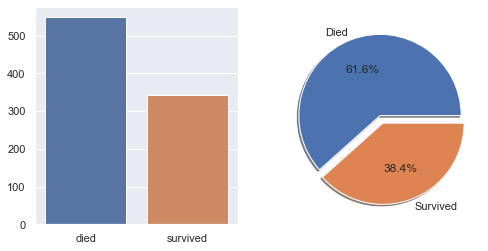

In [328]:
# Survival ratio
f,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
train_data['Survived'].replace({0:"Died",1:"Survived"}).value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[1].set_ylabel('')
sns.countplot(x=train_data['Survived'].replace({0:"died",1:"survived"}),ax=ax[0])
ax[0].set_ylabel('')
ax[0].set_xlabel('')
plt.show()

So, We can observe that only 38.4% of the passanger survived.

Survival VS Sex

In [329]:
def survived_bar_plot(feature):
    plt.figure(figsize=(6,4))
    sns.barplot(data=train_data,x=feature,y="Survived").set_title(f"{feature} Vs Survived")
    plt.show()

In [330]:
def survived_table(feature):
    return train_data[[feature,"Survived"]].groupby([feature], as_index=False).mean().sort_values(by='Survived',ascending=False).style.background_gradient(low=0.75,high=1)

Sex vs Survived

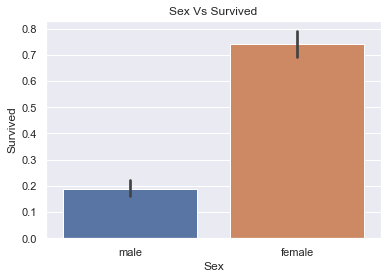

In [331]:
survived_bar_plot('Sex')

In [332]:
survived_table("Sex")

,Sex,Survived
0,female,0.742038
1,male,0.188908


P class vs Survived

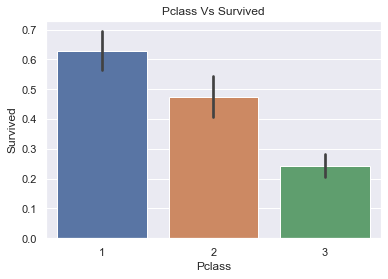

In [333]:
survived_bar_plot('Pclass')

In [334]:
survived_table('Pclass')

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


It is clear from the table and plot that passenger from class P had higer survival rate.

Embarked vs Survived

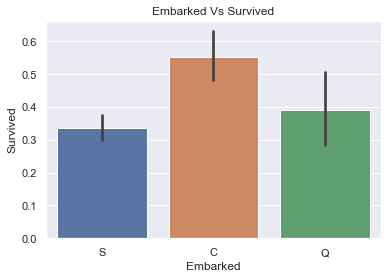

In [335]:
survived_bar_plot('Embarked')

In [336]:
survived_table('Embarked')

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Passenger from Emberaked C are most likly to survive. 

One possible relation : Most P class passenger embarked from C

Parch Vs Survived

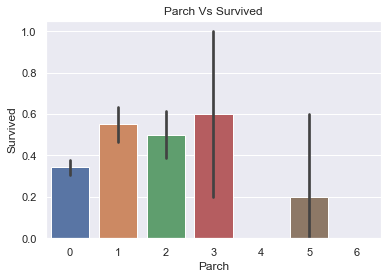

In [337]:
survived_bar_plot('Parch')

In [338]:
survived_table('Parch')

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


SibSp Vs Survived

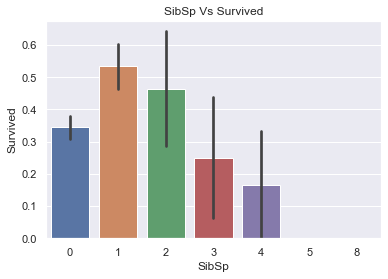

In [339]:
survived_bar_plot('SibSp')

In [340]:
def survived_hist_plot(feature):
    plt.figure(figsize=(6,4))
    sns.histplot(data=train_data,x=feature,hue="Survived", binwidth=5, palette=sns.color_palette(["blue","green"]),multiple="stack").set_title(f"{feature} Vs Survived")
    plt.show()

Age Vs Survive

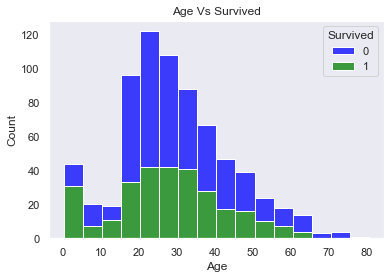

In [341]:
sns.set_style("dark")
survived_hist_plot('Age')

Observations:
* Infants (age<5) and children (b/w 10 and 15) are more likely to survived
* Elder passenger (>75) are more likly to survived.
* Higher number of passenger are in between 15-40 age 

We can make group of age groups of band 5

In [342]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

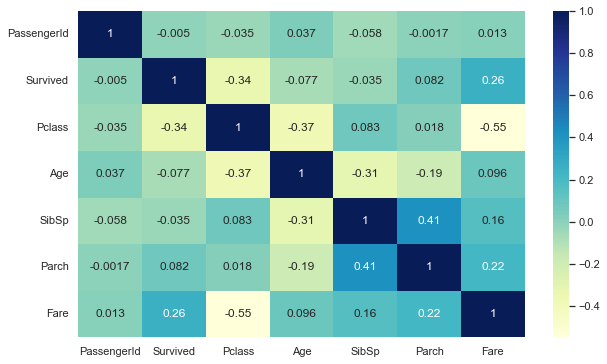

In [343]:
# Correlation between the features
sns.set(rc={'figure.figsize':(10,6)})
sns.heatmap(train_data.corr(),annot=True,fmt='.2g',cmap='YlGnBu',cbar=True)

Observations:
* Strong negative corelation of Pclass with age and Fare
* Negative corelation between of Age with SibSp and Parch

Exploring realtion between Age-Class and Survival?

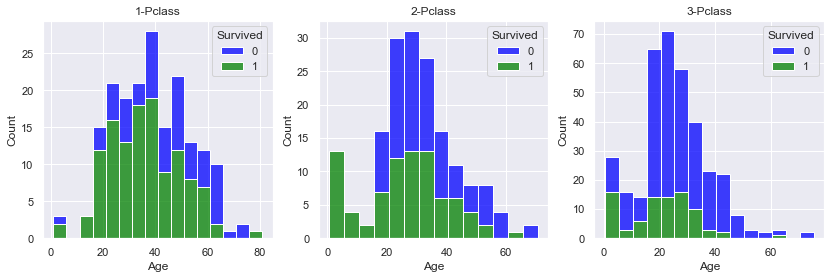

In [344]:
plot, ax= plt.subplots(1,3,figsize=(14,4))
sns.histplot(data=train_data.loc[train_data['Pclass']==1],x='Age',hue='Survived', binwidth=5, ax=ax[0],palette=sns.color_palette(["blue","green"]),multiple="stack").set_title("1-Pclass")
sns.histplot(data=train_data.loc[train_data['Pclass']==2],x='Age',hue='Survived', binwidth=5, ax=ax[1],palette=sns.color_palette(["blue","green"]),multiple="stack").set_title("2-Pclass")
sns.histplot(data=train_data.loc[train_data['Pclass']==3],x='Age',hue='Survived', binwidth=5, ax=ax[2],palette=sns.color_palette(["blue","green"]),multiple="stack").set_title("3-Pclass")
plt.show()

Observations:
* Pclass 3 had highest number of pessengers and had lowest survival rate
* Infant and children from class 1 and 2 mostly survived
* Pclass 1 --> Highest survivals

Relation between Age-Sex and Survival

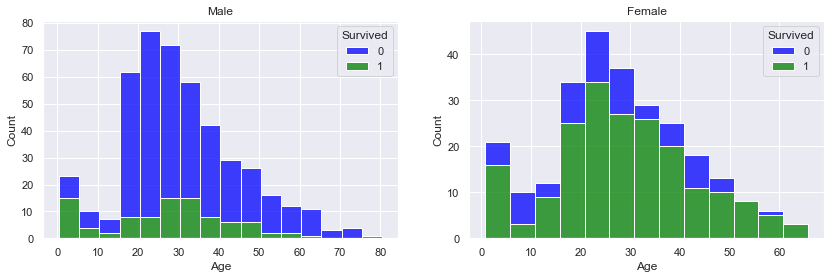

In [345]:
plot, ax= plt.subplots(1,2,figsize=(14,4))
sns.histplot(data=train_data.loc[train_data['Sex']=="male"],x='Age',hue='Survived', binwidth=5, ax=ax[0],palette=sns.color_palette(["blue","green"]),multiple="stack").set_title("Male")
sns.histplot(data=train_data.loc[train_data['Sex']=="female"],x='Age',hue='Survived', binwidth=5, ax=ax[1],palette=sns.color_palette(["blue","green"]),multiple="stack").set_title("Female")

plt.show()

Highest survival rate --> Female

# Droping features

In [346]:
train_data.drop(columns=["PassengerId","Ticket","Cabin"], inplace=True)
test_data.drop(columns=["Ticket","Cabin"], inplace=True)


In [347]:
#filling missing data in Embarked with Max(S)
train_data['Embarked'].fillna(train_data['Embarked'].dropna().max(),inplace=True)
train_data['Embarked']=train_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)
test_data['Embarked']=test_data['Embarked'].map({'S':0,'C':1,'Q':2}).astype(int)

In [348]:
train_data['Sex']=train_data['Sex'].map({'female':1,'male':0}).astype(int)
test_data['Sex']=test_data['Sex'].map({'female':1,'male':0}).astype(int)

In [349]:
# defining a function to fill the missing age 
# replacing nan values with the median in the same category(sex and Pclass)

def fill_age(X):
    
    for i in range(2):#sex
        for j in range(3):#pcalss
            median=train_data['Age'][(train_data['Sex']==i) & (train_data['Pclass']==j+1) ].median()
          
            X.loc[(X['Age'].isnull()) & (X['Sex']==i) & (X['Pclass']==j+1),'Age']=median
    return X

In [350]:
#copy of the train and test data
train_data_cp=train_data.copy()
test_data_cp=test_data.copy()

In [351]:
new_train_data=fill_age(train_data_cp)

In [352]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [353]:
new_train_data.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [354]:
new_test_data=fill_age(test_data_cp)

In [355]:
test_data.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [356]:
new_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
dtype: int64

In [357]:
# #replacing missing values in fare with median of fare in the same category(Pclass)
# def fill_fare(X):
#     X_cp=X.copy()
#     for j in range(3):#pcalss
#             median=train_data['Fare'][(train_data['Pclass']==j+1) ].median()
          
#             X_cp.loc[(X['Age'].isnull()) & (X['Pclass']==j+1),'Fare']=median

#     return X_cp


In [358]:
#median fare for the Pclass=3
median=train_data['Fare'][(train_data['Pclass']==3) ].median()
median

8.05

In [362]:
new_test_data.loc[new_test_data['Fare'].isnull(),'Fare']=median

In [365]:
new_test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [366]:
new_train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


## 1st attempt

In [372]:
#removing name column
train_wo_name=new_train_data.drop('Name',axis=1)
test_wo_name=new_test_data.drop('Name',axis=1)

In [371]:
train_wo_name.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [373]:
from sklearn.model_selection import train_test_split

In [374]:
X=train_wo_name.drop('Survived',axis=1)
y=train_wo_name['Survived']

In [376]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=32)

In [382]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,cross_val_score,StratifiedKFold,learning_curve
from sklearn.pipeline import Pipeline

In [378]:
# Cross validate model with Kfold stratified cross val
cv = StratifiedKFold(n_splits=10)

In [383]:
random_state=32
model_dict={
    'LogisticRegression':LogisticRegression(random_state=random_state),
    'RandomForestClassifier':RandomForestClassifier(random_state=random_state),
    'AdaBoostClassifier':AdaBoostClassifier(random_state=random_state),
    'GradientBoostingClassifier':GradientBoostingClassifier(random_state=random_state),
    'ExtraTreesClassifier':ExtraTreesClassifier(random_state=random_state),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(random_state=random_state),
    'svc':SVC(random_state=random_state),
    'xgb':XGBClassifier()
}

In [384]:
def train_model(model):
    model_pipe=Pipeline([('scale',StandardScaler()),('clf',model)])
    model_pipe.fit(X_train,y_train)
    train_score=model_pipe.score(X_train,y_train)
    test_score=model_pipe.score(X_test,y_test)
    return train_score,test_score

In [385]:
train_score=[]
test_score=[]
for key,value in model_dict.items():
    train,test=train_model(value)
    train_score.append(train)
    test_score.append(test)

In [390]:
model_score=pd.DataFrame({'Model_name':model_dict.keys(),'train_score':train_score,'test_score':test_score})
model_score

,Model_name,train_score,test_score
0,LogisticRegression,0.820225,0.782123
1,RandomForestClassifier,0.987360,0.826816
2,AdaBoostClassifier,0.831461,0.810056
3,GradientBoostingClassifier,0.900281,0.837989
4,ExtraTreesClassifier,0.987360,0.810056
5,KNeighborsClassifier,0.848315,0.798883
6,DecisionTreeClassifier,0.987360,0.770950
7,svc,0.849719,0.821229
8,xgb,0.971910,0.837989


In [521]:
model=MLPClassifier(hidden_layer_sizes=(100,10),activation='tanh',random_state=32)
model_pipe=Pipeline([('scale',StandardScaler()),('clf',model)])
model_pipe.fit(X_train,y_train)
train_score=model_pipe.score(X_train,y_train)
test_score=model_pipe.score(X_test,y_test)

In [522]:
test_score

0.8324022346368715

#Exporting data

In [534]:

id=test_wo_name['PassengerId']
X=test_wo_name.drop(columns=['PassengerId'])

In [535]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [536]:
model_pipe=Pipeline([('scale',StandardScaler()),('clf',XGBClassifier())])
model_pipe.fit(X_train,y_train)
train_score=model_pipe.score(X_train,y_train)
test_score=model_pipe.score(X_test,y_test)


In [537]:
y_pred=model.predict(X)

In [540]:
submission=pd.DataFrame({
    "PassengerId":id,
    "Survived":y_pred
})

In [541]:
submission.to_csv('submission.csv', index=False)